In [199]:
#this is for plotting images 
import matplotlib.pyplot as plt
#this is for dealing with images and pixels
from PIL import Image
import numpy as np 
import cv2

In [114]:
img = cv2.imread('Mars.jpg')
blue_channel, green_channel, red_channel = cv2.split(img)

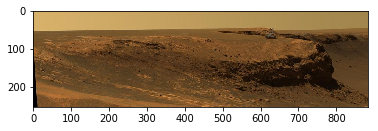

In [236]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Deliverables

### Structuring Element: 3x3 with a=1, b=1

In [207]:
opened=opening(blue_channel, green_channel, red_channel,img,3,3)
closed=closing(blue_channel, green_channel, red_channel,img,3,3)

In [209]:
a = 1
b = 1
incContrast = img + np.absolute(((a*(img-opened)) - (b*(closed-img))))

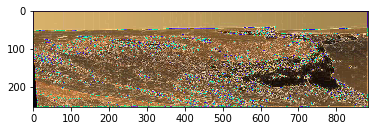

In [232]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()

### Structuring Element: 3x3 with a=1, b=5

In [213]:
a = 1
b = 5
incContrast = img + np.absolute(((a*(img-opened)) - (b*(closed-img))))

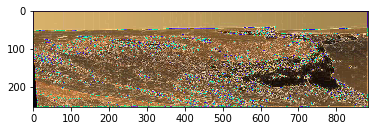

In [233]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()

### Structuring Element: 3x3 with a=5, b=1

In [217]:
a = 5
b = 1
incContrast = img + np.absolute(((a*(img-opened)) - (b*(closed-img))))

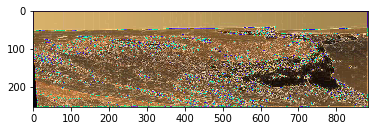

In [219]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()

### Structuring Element: 9x9 with a=1, b=1

In [230]:
opened=opening(blue_channel, green_channel, red_channel,img,9,9)
closed=closing(blue_channel, green_channel, red_channel,img,9,9)

In [234]:
a = 1
b = 1
incContrast = img + np.absolute(((a*(img-opened)) - (b*(closed-img))))

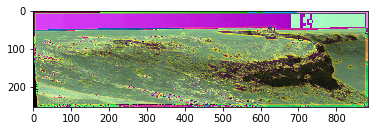

In [235]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()

In [226]:
def dilationOrErosion(blue_channel,green_channel,red_channel,img,length,width,makeDilation):
    
    leftDist=int(width/2)
    upDist=int(length/2)
    newImgB=np.zeros((blue_channel.shape))
    newImgG=np.zeros((green_channel.shape))
    newImgR= np.zeros((red_channel.shape))

   
    for i in range(leftDist,img.shape[0]-leftDist):
        for j in range(upDist,img.shape[1]-upDist): 
                   
                    if(makeDilation):
                        maxB, maxG, maxR=getMaxOrMin(blue_channel,green_channel,red_channel,i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,img,True)
                        newImgB[i][j] += maxB
                        newImgG[i][j] += maxG
                        newImgR[i][j] += maxR
                    else:
                        minB, minG, minR=getMaxOrMin(blue_channel,green_channel,red_channel,i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,img,False)
                        newImgB[i][j] += minB
                        newImgG[i][j] += minG
                        newImgR[i][j] += minR
    newImg = cv2.merge((newImgB, newImgG, newImgR))                   
    return newImg
                   

In [225]:
def getMaxOrMin(blue_channel,green_channel,red_channel,starti,endi,startj,endj,LStrElem,WStrElem,img,getMax):
    
    outputBlue=np.zeros(WStrElem*LStrElem)
    outputGreen=np.zeros(WStrElem*LStrElem)
    outputRed=np.zeros(WStrElem*LStrElem)
    
    index=0
    for k in range(starti,endi):
        for m in range(startj,endj):
            #BGR
            outputBlue[index]+=blue_channel[k][m]
            outputGreen[index]+=green_channel[k][m]
            outputRed[index]+=red_channel[k][m]
            index+=1
    if(getMax):
        return max(outputBlue),max(outputGreen),max(outputRed)
    else:
        return min(outputBlue),min(outputGreen),min(outputRed)
            

In [11]:
newDialation=dilationOrErosion(img,3,3,True)


In [ ]:
plt.imshow(cv2.cvtColor(newDialation, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('dilated.jpg',newDialation) 

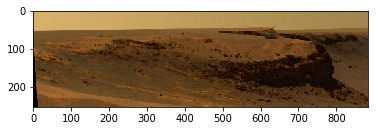

True

In [12]:
newErosion=dilationOrErosion(img,3,3,False)
plt.imshow(cv2.cvtColor(newErosion, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('erosion.jpg',newErosion) 

In [224]:
def opening(blue_channel, green_channel, red_channel,img,length,width):
    erosion=dilationOrErosion(blue_channel, green_channel, red_channel,img,length,width,False)
    new_blue,new_green,new_red = cv2.split(erosion)
    dilation=dilationOrErosion(new_blue,new_green,new_red,erosion,length,width,True)
    return erosion
    

In [222]:
def closing(blue_channel, green_channel, red_channel,img,length,width):
    dilation=dilationOrErosion(blue_channel, green_channel, red_channel,img,length,width,True)
    new_blue,new_green,new_red= cv2.split(dilation)
    erosion=dilationOrErosion(new_blue,new_green,new_red,dilation,length,width,False)
    return erosion